# __2 Estudio Estadístico__

In [2]:
import pandas as pd
data = '../data/raw/crimedataorig.csv'
dataframe = pd.read_csv(data)
print(dataframe.head(5))

       DR_NO               Date Rptd                DATE OCC  TIME OCC  AREA  \
0   10304468  01/08/2020 12:00:00 AM  01/08/2020 12:00:00 AM      2230     3   
1  190101086  01/02/2020 12:00:00 AM  01/01/2020 12:00:00 AM       330     1   
2  200110444  04/14/2020 12:00:00 AM  02/13/2020 12:00:00 AM      1200     1   
3  191501505  01/01/2020 12:00:00 AM  01/01/2020 12:00:00 AM      1730    15   
4  191921269  01/01/2020 12:00:00 AM  01/01/2020 12:00:00 AM       415    19   

     AREA NAME  Rpt Dist No  Part 1-2  Crm Cd  \
0    Southwest          377         2     624   
1      Central          163         2     624   
2      Central          155         2     845   
3  N Hollywood         1543         2     745   
4      Mission         1998         2     740   

                                         Crm Cd Desc  ... Status  \
0                           BATTERY - SIMPLE ASSAULT  ...     AO   
1                           BATTERY - SIMPLE ASSAULT  ...     IC   
2          SEX OFFEN

Vamos a ver graficamente las varibles que tenemos 

__VARIABLES NUMERICAS__

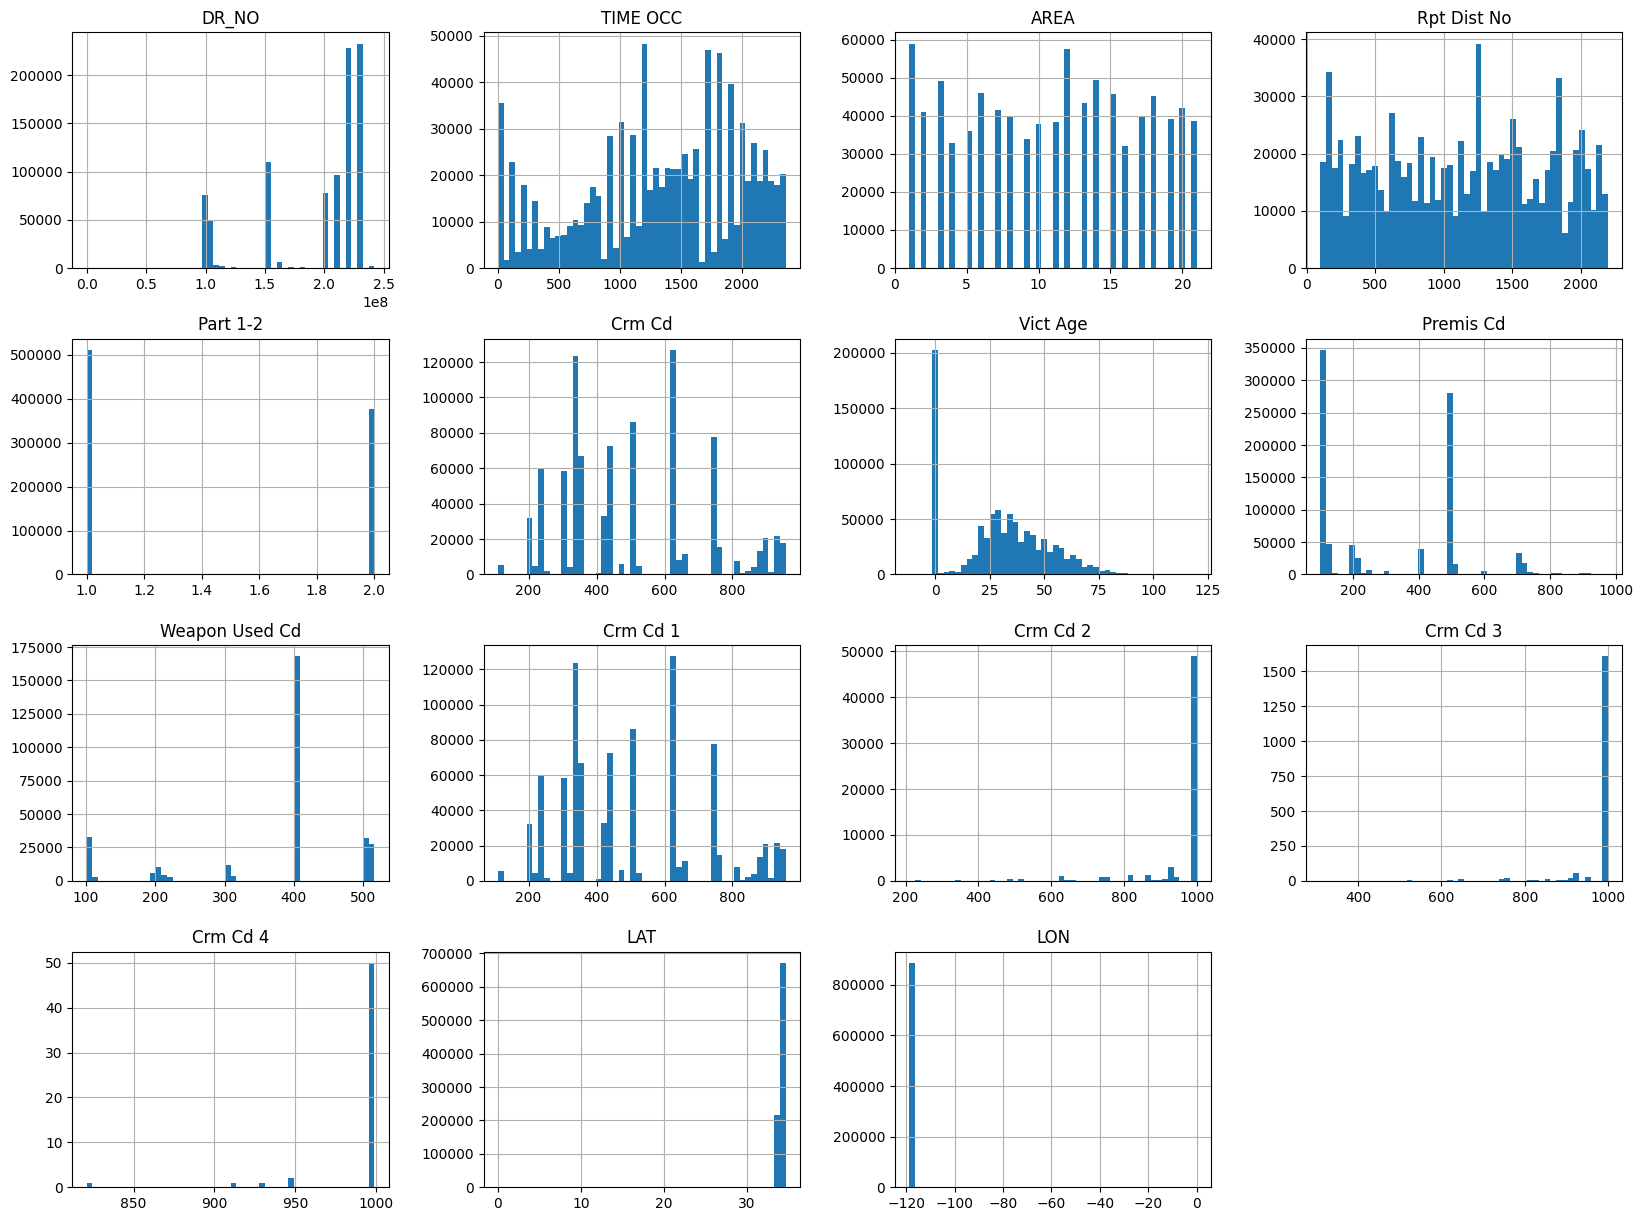

In [3]:
import matplotlib.pyplot as plt
dataframe.hist(bins=50, figsize=(20,15))
plt.show()

__VARIABLES CATEGORICAS__

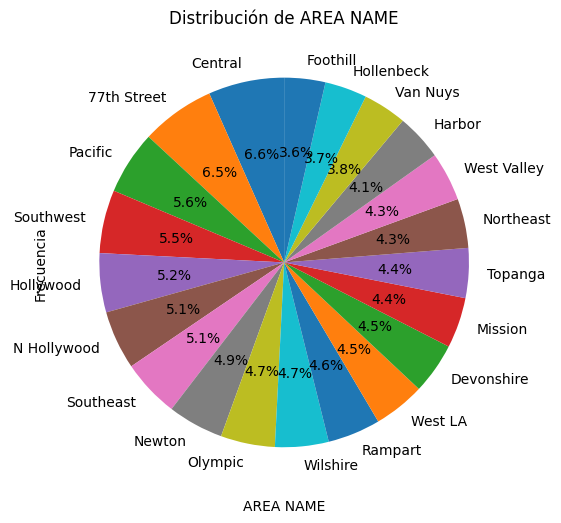

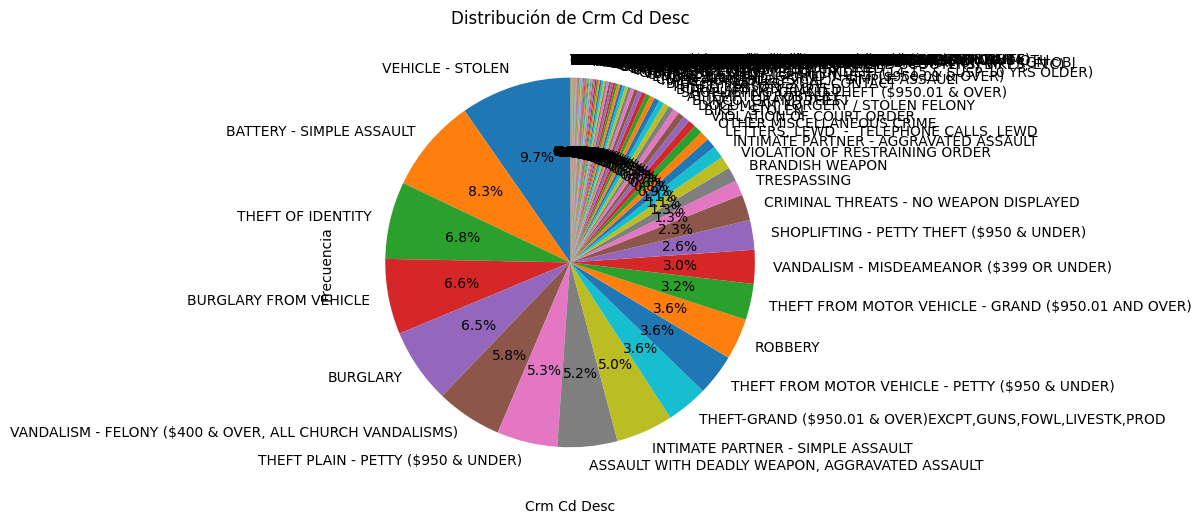

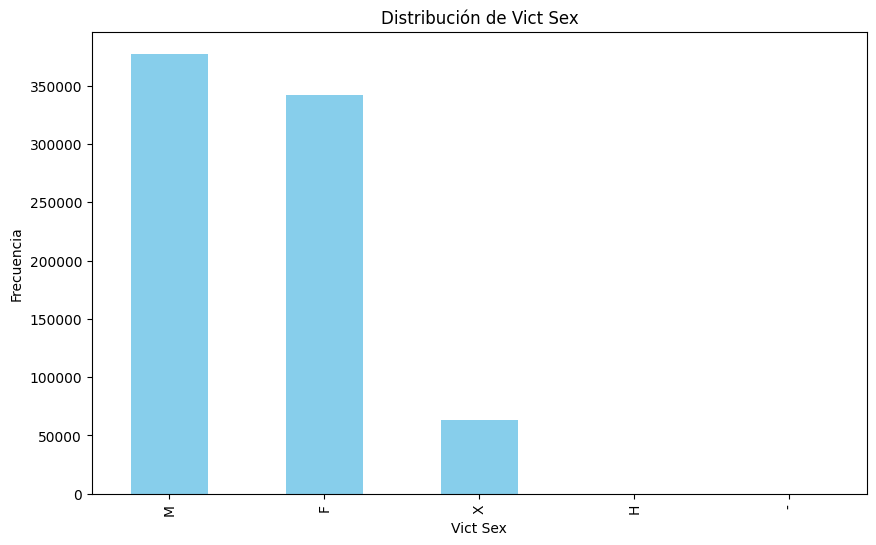

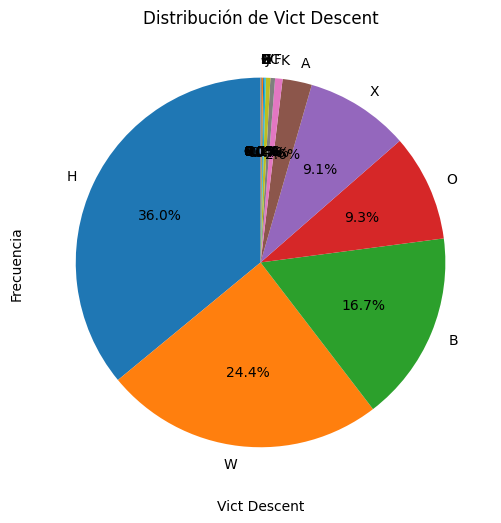

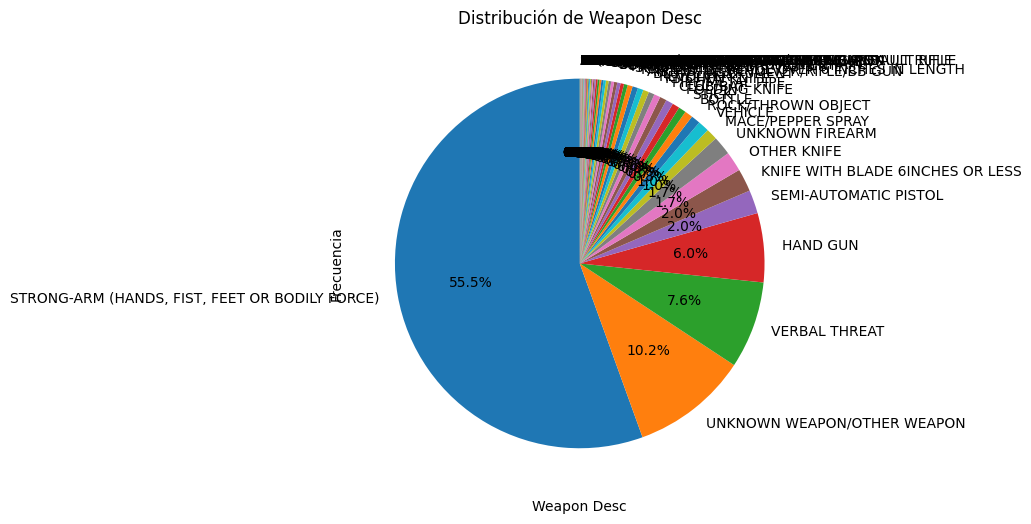

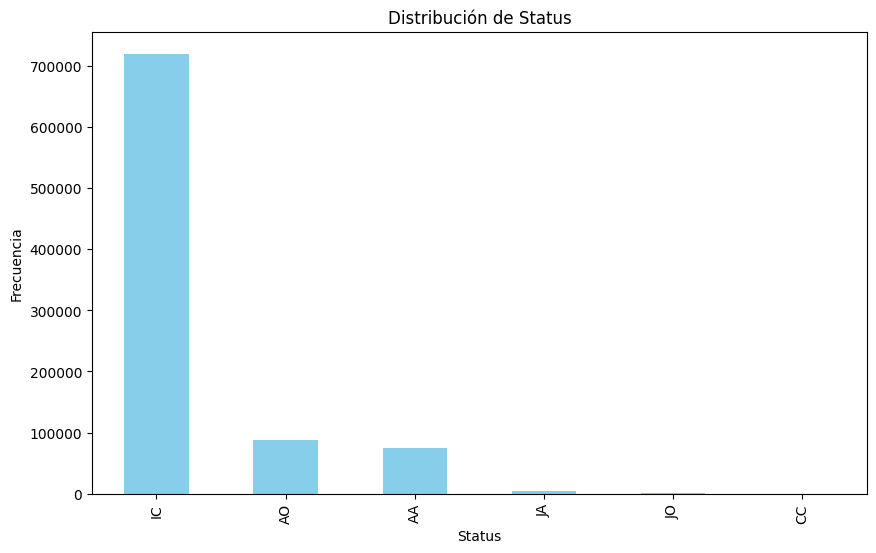

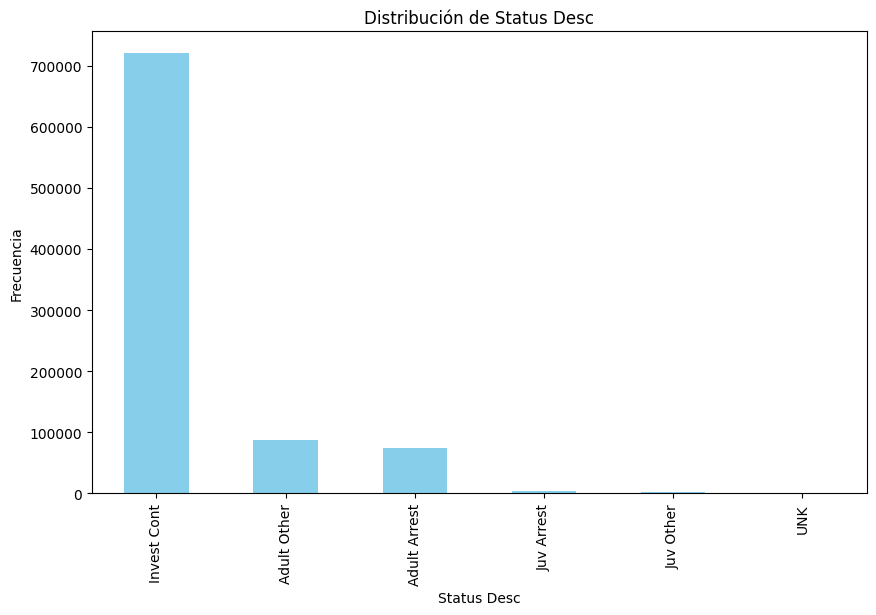

In [4]:
import matplotlib.pyplot as plt

# Seleccionar solo las columnas categóricas
columnas_categoricas = dataframe.select_dtypes(include='object').columns

# Generar gráficos para cada columna categórica con menos de 200 categorías ya que visualmente con mas categorias es dificil de estudiar
for columna in columnas_categoricas:
    if dataframe[columna].nunique() <= 200:
        if dataframe[columna].nunique() <= 10:  # Utilizar gráfico de barras para menos de 10 categorías
            dataframe[columna].value_counts().plot(kind='bar', figsize=(10, 6), color='skyblue')
        else:  # Utilizar gráfico circular para más de 10 categorías
            dataframe[columna].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(10, 6), startangle=90)

        plt.title(f'Distribución de {columna}')
        plt.xlabel(columna)
        plt.ylabel('Frecuencia')
        plt.show()



__Valores Nulos__

In [5]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 888472 entries, 0 to 888471
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           888472 non-null  int64  
 1   Date Rptd       888472 non-null  object 
 2   DATE OCC        888472 non-null  object 
 3   TIME OCC        888472 non-null  int64  
 4   AREA            888472 non-null  int64  
 5   AREA NAME       888472 non-null  object 
 6   Rpt Dist No     888472 non-null  int64  
 7   Part 1-2        888472 non-null  int64  
 8   Crm Cd          888472 non-null  int64  
 9   Crm Cd Desc     888472 non-null  object 
 10  Mocodes         773758 non-null  object 
 11  Vict Age        888472 non-null  int64  
 12  Vict Sex        782242 non-null  object 
 13  Vict Descent    782233 non-null  object 
 14  Premis Cd       888458 non-null  float64
 15  Premis Desc     888047 non-null  object 
 16  Weapon Used Cd  302570 non-null  float64
 17  Weapon Des

__Descripcion Estadística__

In [6]:
dataframe.describe()

,DR_NO,TIME OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Vict Age,Premis Cd,Weapon Used Cd,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LAT,LON
count,8.884720e+05,888472.000000,888472.000000,888472.000000,888472.000000,888472.000000,888472.000000,888458.000000,302570.000000,888461.000000,60942.000000,1807.000000,55.000000,888472.000000,888472.000000
mean,1.940185e+08,1340.620272,10.830956,1129.520094,1.424423,500.662327,30.091994,311.305354,365.830350,500.446992,956.283548,980.957388,990.072727,34.035509,-118.213958
std,4.546155e+07,651.780846,6.116259,611.667538,0.494255,208.816153,21.445355,215.853424,121.273392,208.640473,113.696188,62.186702,29.075161,1.184996,4.098553
min,8.170000e+02,1.000000,1.000000,101.000000,1.000000,110.000000,-12.000000,101.000000,101.000000,110.000000,210.000000,310.000000,821.000000,0.000000,-118.766800
25%,1.519222e+08,900.000000,6.000000,628.000000,1.000000,330.000000,15.000000,102.000000,400.000000,330.000000,998.000000,998.000000,998.000000,34.014600,-118.432100
50%,2.202064e+08,1415.000000,11.000000,1153.000000,1.000000,442.000000,31.000000,207.000000,400.000000,442.000000,998.000000,998.000000,998.000000,34.059800,-118.324100
75%,2.301216e+08,1900.000000,16.000000,1651.000000,2.000000,626.000000,45.000000,501.000000,400.000000,626.000000,998.000000,998.000000,998.000000,34.168500,-118.274000
max,2.421046e+08,2359.000000,21.000000,2198.000000,2.000000,956.000000,120.000000,976.000000,516.000000,956.000000,999.000000,999.000000,999.000000,34.706000,0.000000


__Tamaño de nuestra base de datos a estudiar__

In [8]:
print(f'Filas: {dataframe.shape[0]}')
print(f'Columnas: {dataframe.shape[1]}')


Filas: 888472
Columnas: 28


__Columnas de nuestro DataFramte__

In [12]:
dataframe.columns


Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON'],
      dtype='object')

__Valores unicos de cada columnas__

In [10]:
dataframe.nunique()


DR_NO             888472
Date Rptd           4525
DATE OCC            2191
TIME OCC            1439
AREA                  21
AREA NAME             21
Rpt Dist No         1222
Part 1-2               2
Crm Cd               140
Crm Cd Desc          140
Mocodes           272008
Vict Age             112
Vict Sex               5
Vict Descent          20
Premis Cd            320
Premis Desc          312
Weapon Used Cd        79
Weapon Desc           78
Status                 6
Status Desc            6
Crm Cd 1             143
Crm Cd 2             125
Crm Cd 3              36
Crm Cd 4               6
LOCATION           65692
Cross Street        9745
LAT                 5381
LON                 5004
dtype: int64